# Hominid dataset analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
#read data
hominid = pd.read_csv("Homininos_DataSet (1).csv")
print(hominid.keys())

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')


In [17]:
hominid.describe()


,Cranial_Capacity,Height,mya_time
count,720.000000,720.000000,720.000000
mean,614.942083,131.760500,2.355417
std,346.320990,24.253131,1.767004
min,80.840000,80.210000,0.100000
25%,339.812500,113.160000,0.900000
50%,491.345000,126.835000,2.100000
75%,924.012500,152.350000,3.500000
max,1355.730000,184.050000,7.000000


### Objective 1: 

#### Is hominid cranial capacity correlated with variables related to diet (Incisor Size, Jaw Shape, Canine Size, Canines Shape, Tooth Enamel, Diet)?

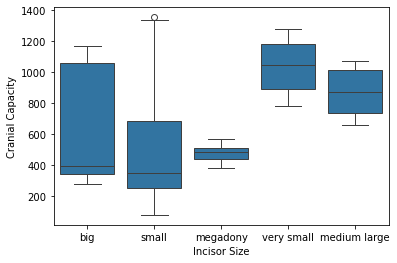

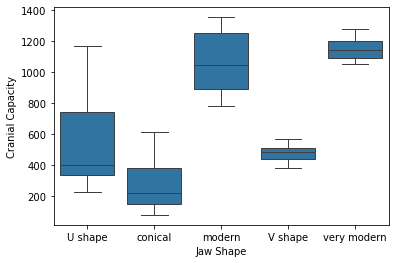

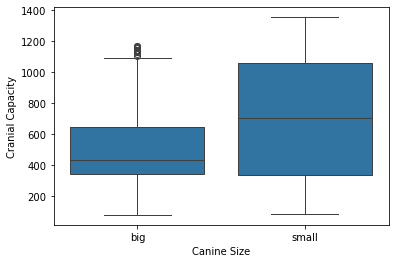

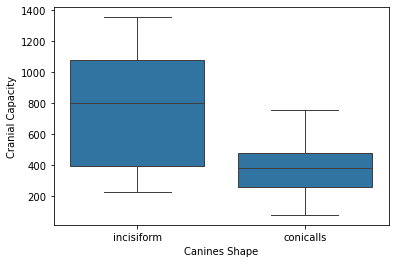

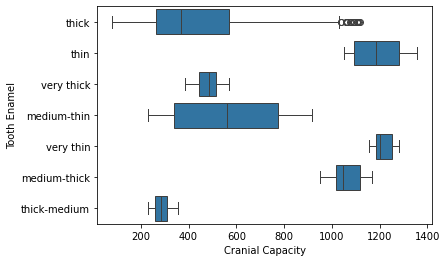

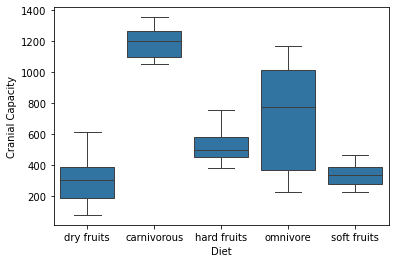

In [6]:
#make graphs for each variable
sns.boxplot(y = 'Cranial_Capacity', x = 'Incisor_Size', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Incisor Size')
plt.show()
plt.close()

sns.boxplot(y = 'Cranial_Capacity', x = 'Jaw_Shape', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Jaw Shape')
plt.show()
plt.close()

sns.boxplot(y = 'Cranial_Capacity', x = 'Canine Size', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Canine Size')
plt.show()
plt.close()

sns.boxplot(y = 'Cranial_Capacity', x = 'Canines_Shape', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Canines Shape')
plt.show()
plt.close()

sns.boxplot(x = 'Cranial_Capacity', y = 'Tooth_Enamel', data = hominid) 
plt.xlabel('Cranial Capacity')
plt.ylabel('Tooth Enamel')
plt.show()
plt.close()

sns.boxplot(y = 'Cranial_Capacity', x = 'Diet', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Diet')
plt.show()
plt.close()


On first examination, yes, several traits related to diet seem to have a correlation with Cranial capacity. Some of the traits associated with larger cranial volumes are
- very-small and medium-large incisors
- modern or very modern jaw-shape
- thin, very thin, or medium thick tooth enamel
- carnivorous diet


### Objective 2:

#### Is hominid height related to the habitat where species lived? Has height changed through time?

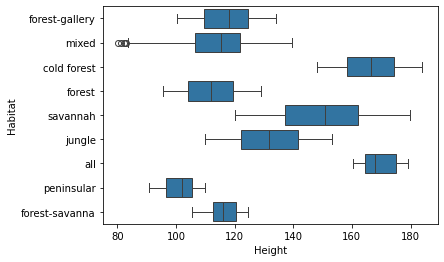

In [9]:
#relationship between height and habitat
sns.boxplot(x = 'Height', y = 'Habitat', data = hominid) 
plt.xlabel('Height')
plt.ylabel('Habitat')
plt.show()
plt.close()


At first glance, there is not a lot of variation in the height of hominid species across different habitats, except for those living in **cold forests** and **savannahs**, who thend to be much **taller** than the average.

The column 'Time' is crucial for my analyses but the formatting is not consistent among all data points and cannot be interpreted as an ordered categorical variable. In the following lines I develop a loop in which I

1. Go through each row
2. Check if the line contains a '-'
3. If the line contains a '-', split the line and keep only the first number
4. Check if the number contains a 'ma'
5. If the number contains a 'ma', keep only the first character
6. If the number doesn't contain a 'ma', keep only the first chacter and add a '0.' before it

The previous part of the loop ensures I only keep the oldest known appearance of the species, expressed as million years ago, and converts the ones expressed in thousand years ago to million years ago.


In [10]:
#Converting Time into Oldest known record (mya)

h_time = hominid['Time']
mya_time = []

for item in h_time:
    if '-' in item:
        x = item.split('-')
        if 'ma' in x[0]:
            mya_time.append(float(x[0][0]))
        elif '.' in x[0]:
            mya_time.append(float(x[0]))
        else:
            mya_time.append(float('0.' + x[0]))
    else:
        mya_time.append(float(item))
        
#print(mya_time)
hominid['mya_time'] = mya_time

#print(hominid.head())
hominid.mya_time.describe()

count    720.000000
mean       2.355417
std        1.767004
min        0.100000
25%        0.900000
50%        2.100000
75%        3.500000
max        7.000000
Name: mya_time, dtype: float64

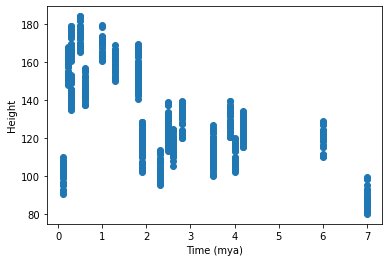

In [18]:
#relationship between height and time

plt.scatter(x = hominid.mya_time, y = hominid.Height)
plt.ylabel('Height')
plt.xlabel('Time (mya)')
plt.show()
plt.close()

Overall, hominids tended to get taller in the recent past (less than 2 mya), with the exception of a group of hominids that are short in size. 

To confirm if my hypothesis is true and this subset actually represents only one species living in a specific habitat, I filtered out the information for Species and Habitat from the Hominid datasert, taking into account that time in mya is less than 0.5 and height is less than 120:

In [42]:
#find out if the shorter modern hominids all belong to the same species

#list comprehension to filter values
short_species_list = pd.DataFrame([hominid.loc[i, 'Genus_&_Specie'] for i in range(len(hominid)) 
                      if hominid.loc[i, 'mya_time'] < 0.5 and hominid.loc[i, 'Height'] < 120])
short_habitat_list = pd.DataFrame([hominid.loc[i, 'Habitat'] for i in range(len(hominid)) 
                      if hominid.loc[i, 'mya_time'] < 0.5 and hominid.loc[i, 'Height'] < 120])

#print only the unique values in the resulting dataframes
print('Species: ' + short_species_list.drop_duplicates())
print('Habitat: ' + short_habitat_list.drop_duplicates())


                            0
0  Species: Homo Floresiensis
                     0
0  Habitat: peninsular


_Homo florisiensis_ is a recently extinct hominid species characterized for its small body and small cranial capacity, likely resulting from insular dwarfism, where size decreases as a response to fewer resources in an island or peninsular ecosystem.

### Objective 3:

#### How did the skull shape of hominids (Prognathism, Foramen Mágnum Position, Torus Supraorbital) change over time?

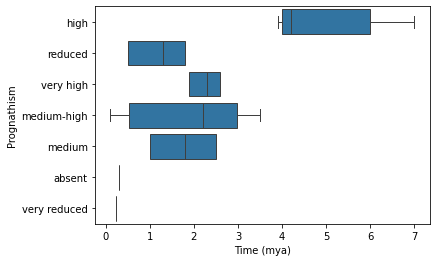

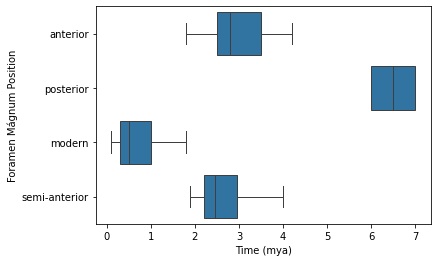

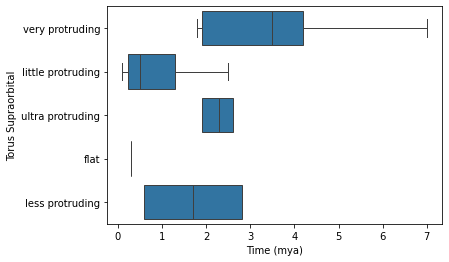

In [16]:
#make graphs for each variable
sns.boxplot(y = 'Prognathism', x = 'mya_time', data = hominid) 
plt.ylabel('Prognathism')
plt.xlabel('Time (mya)')
plt.show()
plt.close()

sns.boxplot(y = 'Foramen_Mágnum_Position', x = 'mya_time', data = hominid) 
plt.ylabel('Foramen Mágnum Position')
plt.xlabel('Time (mya)')
plt.show()
plt.close()

sns.boxplot(y = 'Torus_Supraorbital', x = 'mya_time', data = hominid) 
plt.ylabel('Torus Supraorbital')
plt.xlabel('Time (mya)')
plt.show()
plt.close()

All features describing skull shape have changed through time:
- Prognatism went from high to absent or very reduced in modern hominids
- The position of the foramen mágnum moved from the back of the skull towards the front, and assumed modern hominid position about 1 mya
- The torus supraorbital went from very pronounced to less pronounced, until assuming a flat shape in modern hominid.